<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/Pytoch_practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import torch
from torch import nn

In [149]:
weights = 0.7
bias = 0.3
X = torch.arange(0, 1, 0.01)
print(X[:10])
print(len(X))

tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
100


In [150]:
split = int(0.8*len(X))
X_train = (X[:split])
y_train = (X[:split])
X_test = (X[split:])
y_test = (X[split:])

In [151]:
import matplotlib.pyplot as plt
def plot_predictions(training_data = X_train, training_label = y_train, testing_data = X_test, testing_label = y_test, predictions = None):
  plt.figure(figsize = (10, 7))
  plt.scatter(training_data, training_label, s=4, c="b", label = "Training Data")
  plt.scatter(testing_data, testing_label, s=4, c="g", label = "Testing Data")
  if predictions is not None:
    plt.scatter(testing_data, predictions, s=4, c="r", label = "Predictions")
  plt.legend();

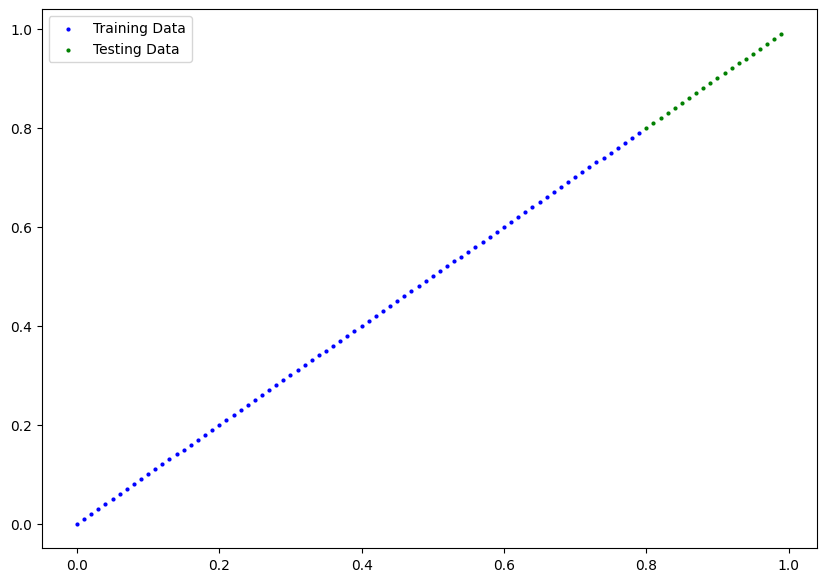

In [152]:
plot_predictions()

In [153]:
class LinRegMod(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))
    self.bias = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))
  def forward(self, X:torch.Tensor)-> torch.Tensor:
    return self.weights * X + self.bias

In [154]:
torch.manual_seed(42)
model_00 = LinRegMod()
print(list(model_00.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


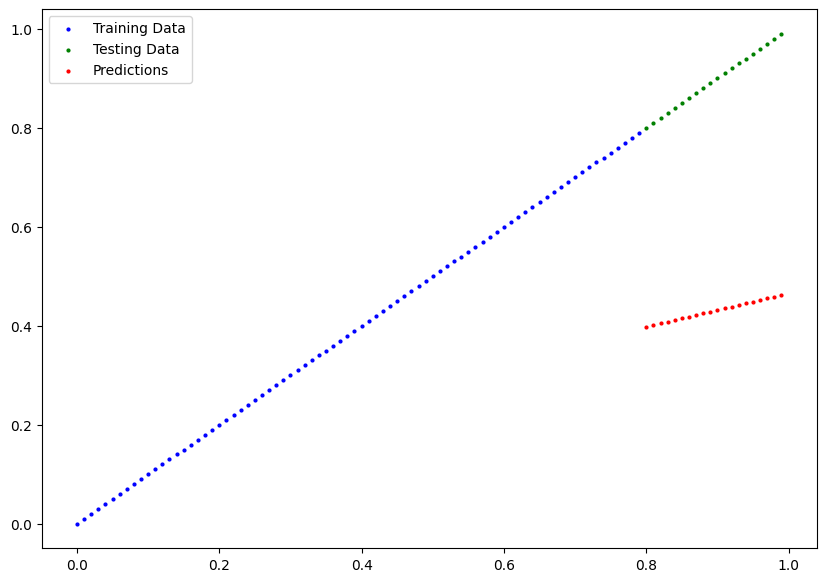

In [155]:
with torch.inference_mode():
  preds = model_00(X_test)

plot_predictions(predictions = preds)

In [156]:
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params = model_00.parameters(), lr = 0.02)

In [157]:
torch.manual_seed(42)
epochs = 200

for epoch in range(epochs):
  model_00.train()
  training_preds = model_00(X_train)
  training_loss = loss_fn(training_preds, y_train)
  optimizer.zero_grad()
  training_loss.backward()
  optimizer.step()

  model_00.eval()
  with torch.inference_mode():
    testing_preds = model_00(X_test)
    testing_loss = loss_fn(testing_preds, y_test.type(torch.float))

  if epoch % 10==0:
    print(f"epopch: {epoch}, Testing Loss: {testing_loss}, Training Loss: {training_loss}")

epopch: 0, Testing Loss: 0.44863247871398926, Training Loss: 0.16609539091587067
epopch: 10, Testing Loss: 0.3345085084438324, Training Loss: 0.12398167699575424
epopch: 20, Testing Loss: 0.2773430049419403, Training Loss: 0.11096646636724472
epopch: 30, Testing Loss: 0.2469838410615921, Training Loss: 0.10330437123775482
epopch: 40, Testing Loss: 0.22618451714515686, Training Loss: 0.09636124223470688
epopch: 50, Testing Loss: 0.2102007418870926, Training Loss: 0.08950907737016678
epopch: 60, Testing Loss: 0.19352898001670837, Training Loss: 0.08265887200832367
epopch: 70, Testing Loss: 0.1775452196598053, Training Loss: 0.07580671459436417
epopch: 80, Testing Loss: 0.16156141459941864, Training Loss: 0.06895455718040466
epopch: 90, Testing Loss: 0.1448897272348404, Training Loss: 0.062104351818561554
epopch: 100, Testing Loss: 0.1289059966802597, Training Loss: 0.055252186954021454
epopch: 110, Testing Loss: 0.11292225122451782, Training Loss: 0.048400018364191055
epopch: 120, Testin

In [158]:

model_00.state_dict()

OrderedDict([('weights', tensor([0.9926])), ('bias', tensor([0.0088]))])

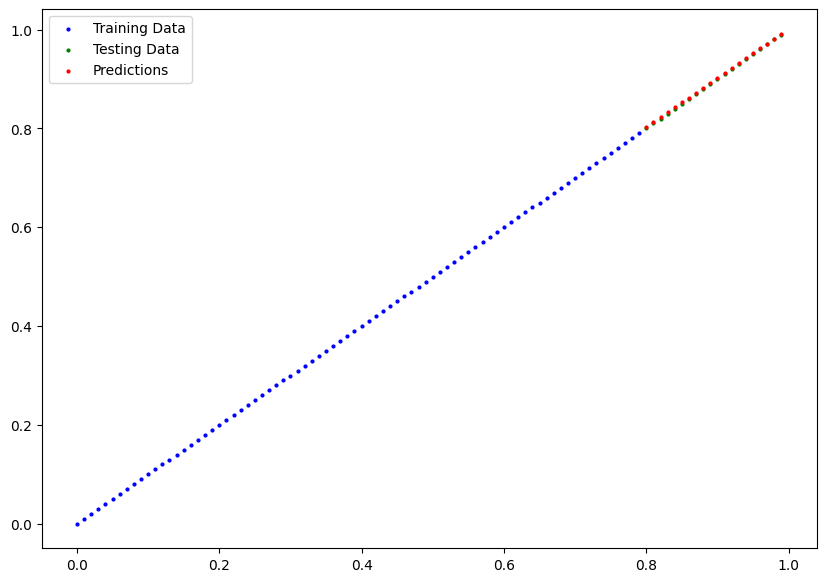

In [159]:
plot_predictions(predictions = testing_preds)

tensor([0.8029, 0.8128, 0.8228, 0.8327, 0.8426, 0.8526, 0.8625, 0.8724, 0.8823,
        0.8923, 0.9022, 0.9121, 0.9220, 0.9320, 0.9419, 0.9518, 0.9617, 0.9717,
        0.9816, 0.9915])


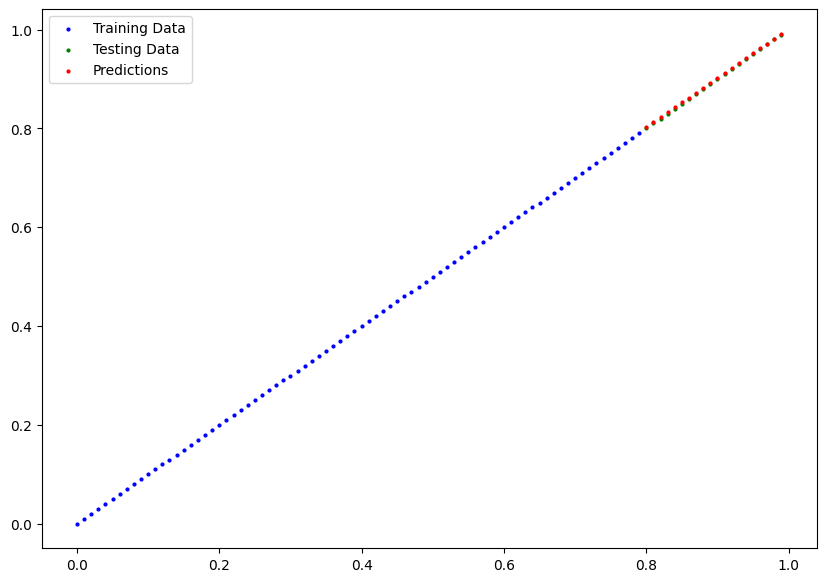

In [161]:
with torch.inference_mode():
  predicts = model_00(X_test)
  print(predicts)
plot_predictions(predictions = predicts)